In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

In [2]:
def plot_correlation_functions( time, corrfuncs, mean, title ):
    fig = plt.figure()
    plt.title(title)
    plt.xlabel(r'time, s')
    plt.ylabel(r'Correlation function')
    plt.xlim((0.0, 1.5e-13))
    
    for corrfunc in corrfuncs:
        plt.plot(time, corrfunc, color = '0.6', lw = 2.0)
    
    plt.plot(time, mean, 'r', lw = 2.0)
    plt.grid(linestyle = ':', alpha = 0.7)

In [3]:
def chunker(seq, size):
    return (tuple(seq[pos:pos+size]) for pos in xrange(0, len(seq), size))        
        
def mean( group ):
    return np.mean(group, axis = 0)
        
def group_by( lists, size ):
    res = []
   
    for group in chunker(range(len(lists)), size):
        res.append( mean([lists[g] for g in group]) )
    
    return res

In [4]:
from os import listdir
from os.path import isfile, join

path = './blocks/'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]

times = []
corrfunc_blocks = []
for f in files:
    data = np.loadtxt(f, delimiter = " ")
    times.append(data[:, 0])
    corrfunc_blocks.append(data[:, 1])

<IPython.core.display.Javascript object>


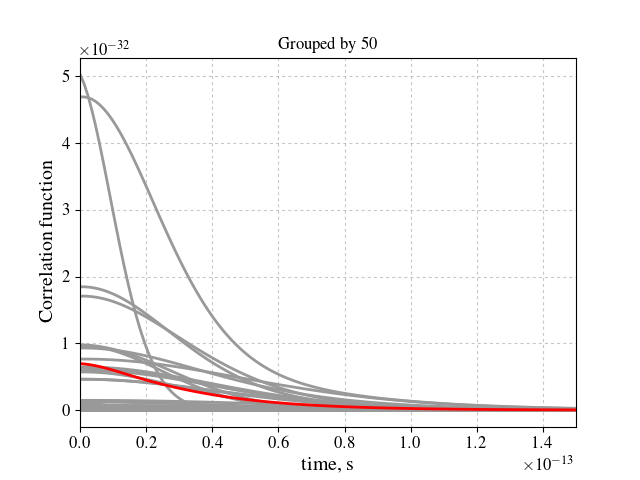

In [40]:
mean_corr_func = group_by( corrfunc_blocks, len(corrfunc_blocks) )[0]

t = np.concatenate( (times[0][::-1], times[0]), axis = 0 )
m = np.concatenate( (mean_corr_func[::-1], mean_corr_func), axis = 0 )
data = np.vstack((t, m))
np.savetxt("./blocks/mean.txt",  np.transpose(data))

plot_correlation_functions( times[0], corrfunc_blocks, mean_corr_func, "Grouped by 50" )

<IPython.core.display.Javascript object>


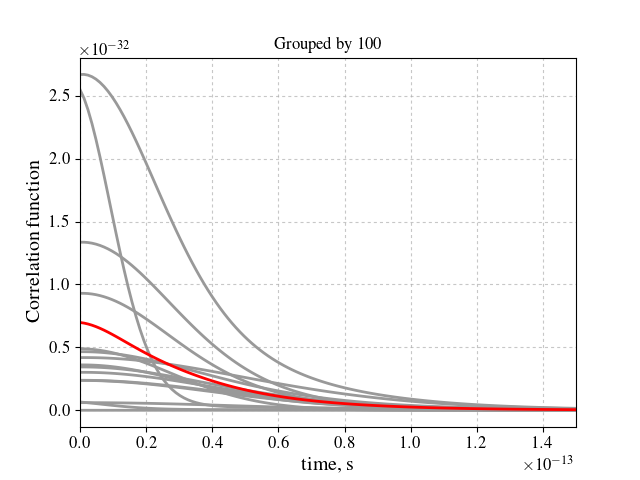

In [6]:
corrfunc_by_100 = group_by( corrfunc_blocks, 2 )
plot_correlation_functions( times[0], corrfunc_by_100, mean_corr_func, "Grouped by 100" )

<IPython.core.display.Javascript object>


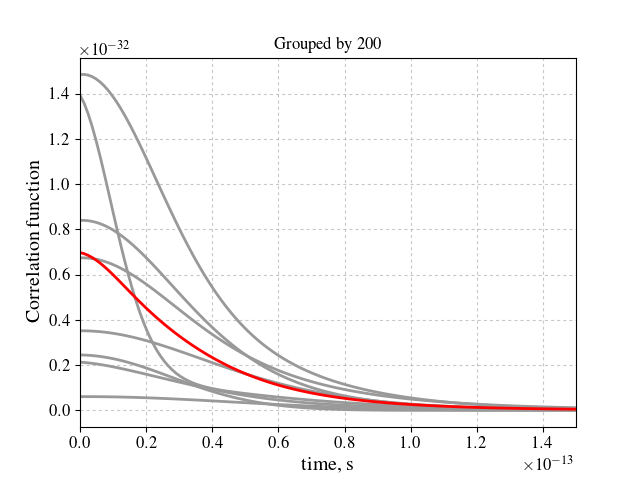

In [7]:
corrfunc_by_200 = group_by( corrfunc_blocks, 4 )
plot_correlation_functions( times[0], corrfunc_by_200, mean_corr_func, "Grouped by 200" )

<IPython.core.display.Javascript object>


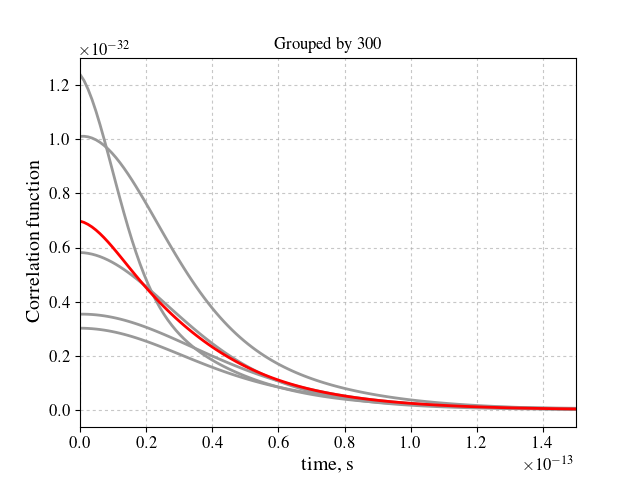

In [8]:
corrfunc_by_300 = group_by( corrfunc_blocks, 6 )
plot_correlation_functions( times[0], corrfunc_by_300, mean_corr_func, "Grouped by 300" )

array([ -1.27021958e-39,  -1.27447051e-39,  -1.27875870e-39, ...,
        -1.27875870e-39,  -1.27447051e-39,  -1.27021958e-39])